In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
# import sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df =sns.load_dataset("titanic")

In [3]:
X=df[["pclass","sex","age","sibsp","parch","fare"]]
y=df["survived"]

In [4]:
X = pd.get_dummies(X, columns=["sex"])

In [5]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [6]:
X.age.fillna(value=X["age"].mean(), inplace=True)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = model.predict(X_test)

In [10]:
print("Accurancy: ", accuracy_score(y_test, y_pred))

Accurancy:  0.7988826815642458


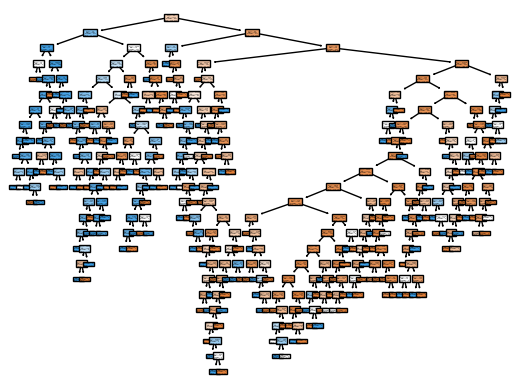

<Figure size 640x480 with 0 Axes>

In [11]:
tree.plot_tree(model.fit(X,y), filled=True)
plt.show()
plt.savefig("tree.png",format="pdf",dpi=300)

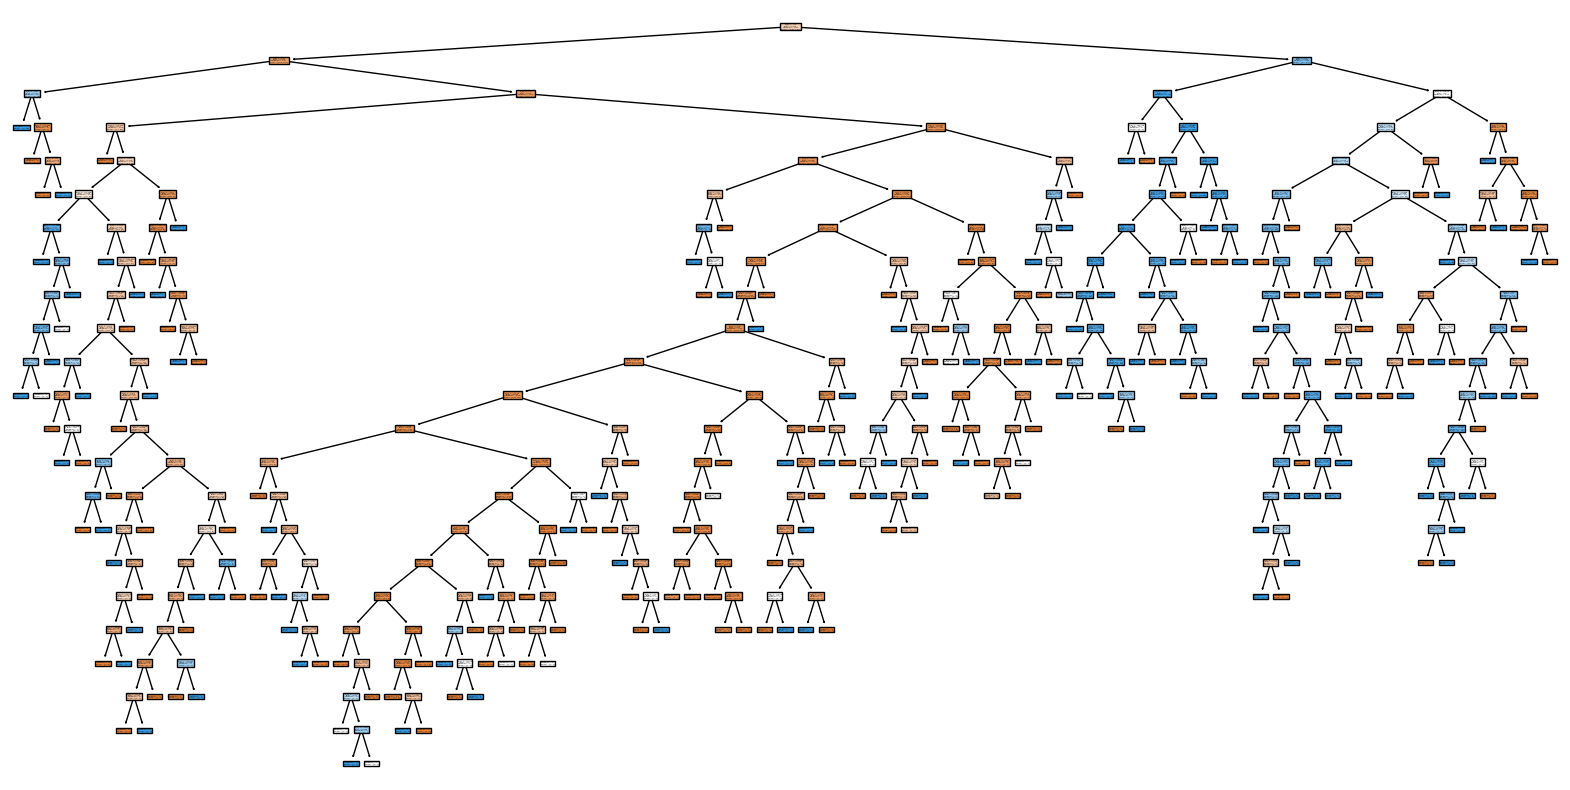

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig("decision_tree.pdf", format="pdf", dpi = 300)

In [13]:
# Precision
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_pred)


0.7611940298507462

## Precision: Precision measure the proportion of true positive predictions among all predictions

In [14]:
recall_score(y_test, y_pred)



0.7183098591549296

## Recall: Recall measures the proportion of true positive predictions among all actual positive instances

In [15]:
f1_score(y_test, y_pred)

0.7391304347826085

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

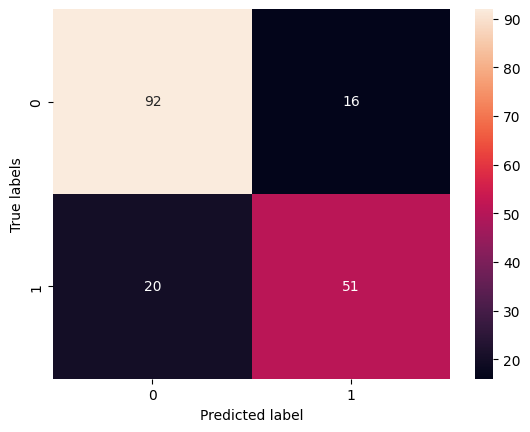

In [17]:
sns.heatmap(cm,annot=True)
plt.ylabel("True labels")
plt.xlabel("Predicted label")

# K Nearest Neighbours(KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[82, 26],
       [29, 42]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

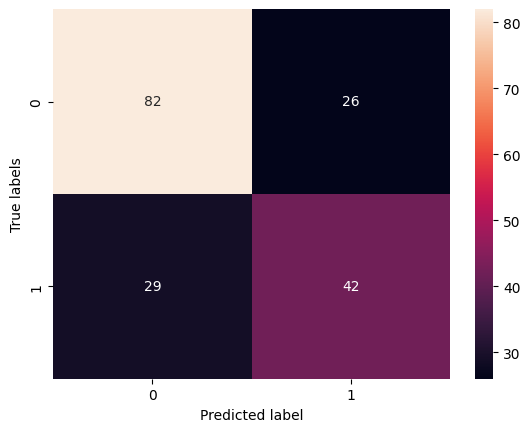

In [19]:
sns.heatmap(cm,annot=True)
plt.ylabel("True labels")
plt.xlabel("Predicted label")

In [20]:
precision_score(y_test,y_pred)

0.6176470588235294

In [21]:
recall_score(y_test,y_pred)

0.5915492957746479

# random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
print("precision score: ", precision_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("confusion_matrix: ", cm)

precision score:  0.8095238095238095
recall score:  0.7183098591549296
f1 score:  0.7611940298507462
confusion_matrix:  [[96 12]
 [20 51]]


## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
print("precision score: ", precision_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("confusion_matrix: ", cm)

precision score:  0.6710526315789473
recall score:  0.7183098591549296
f1 score:  0.6938775510204082
confusion_matrix:  [[83 25]
 [20 51]]


c:\Users\qadir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM

In [24]:
# SVM
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
print("precision score: ", precision_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("confusion_matrix: ", cm)

precision score:  0.6341463414634146
recall score:  0.36619718309859156
f1 score:  0.4642857142857143
confusion_matrix:  [[93 15]
 [45 26]]


# Naive Bayes

In [25]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
print("precision score: ", precision_score(y_test,y_pred))
print("recall score: ", recall_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("confusion_matrix: ", cm)

precision score:  0.6933333333333334
recall score:  0.7323943661971831
f1 score:  0.7123287671232877
confusion_matrix:  [[85 23]
 [19 52]]


In [26]:
# import classifier algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [27]:
# define the models to be evaluated
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ["Logistic Regression", "KNN", "Random Forest", "SVM"]

Subject of notebook :  Perform k-fold cross-validation for each model\
Name of the auther : Qadir Shahbaz\
Where to contact : qadir_shahbaz@yahoo.co.uk\
date : 22/01/2023 

In [ ]:
from sklearn.model_selection import cross_val_score


k = 10
for name, model in zip(names, models):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k)
    print(f"{name} CV accuracy: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}")

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.1, 1, 10]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.79


## Recall evaluation method

In [30]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


model = LogisticRegression(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(),KNeighborsClassifier()
model_name = "Logistic Regression", "SVC", "Decision tree", "Random Forest", "KNN"
models_scores = []
for model, model_name in zip(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Recall = recall_score(y_test, y_pred)
    models_scores.append([model_name,Recall])
    print(f"{model_name} recall score: {Recall:.3f}")
    

Logistic Regression recall score: 0.718
SVC recall score: 0.366


c:\Users\qadir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision tree recall score: 0.732
Random Forest recall score: 0.704
KNN recall score: 0.634


Subject of notebook : F1 ke base per best model\
Name of the auther : Qadir Shahbaz\
Where to contact : qadir_shahbaz@yahoo.co.uk\
date : 22/01/2023

##  F1 Score evaluation method

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


model = LogisticRegression(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(),KNeighborsClassifier()
model_name = "Logistic Regression", "SVC", "Decision tree", "Random Forest", "KNN"
models_scores = []
for model, model_name in zip(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_score = recall_score(y_test, y_pred)
    models_scores.append([model_name,f1_score])
    print(f"{model_name} f1_score: {f1_score:.3f}")

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the parameter grid
# param_grid = {'C': [0.1, 1, 10],
#               'kernel': ['linear', 'rbf'],
#               'gamma': [0.1, 1, 10]}

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{"alpha": alphas}]
n_folds = 5

grid_search = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best F1 score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.0037065129109221566}
Best F1 score: 0.39


# Precision score evaluation method

In [83]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


model = LogisticRegression(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(),KNeighborsClassifier()
model_name = "Logistic Regression", "SVC", "Decision tree", "Random Forest", "KNN"
models_scores = []
for model, model_name in zip(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Precision = precision_score(y_test, y_pred)
    models_scores.append([model_name,Precision])
    print(f"{model_name} Precision score: {Precision:.3f}")

Logistic Regression Precision score: 0.712
SVC Precision score: 0.650
Decision tree Precision score: 0.700
Random Forest Precision score: 0.667
KNN Precision score: 0.597
